In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# read in csv file into pandas dataframe 
base_df = pd.read_csv('fantasy-csvs/FantasyPros_2022_RB_Rank.csv')

# dropping irrelevant columns 
lst_columns_to_drop = ['LG', 'ROST', 'FL']
base_df = base_df.drop(columns=lst_columns_to_drop)
base_df.set_index('Player', inplace=True)

# have to rename columns to avoid confusion
base_df = base_df.rename(columns={'YDS' : 'RUSHYDS', 'TD': 'RUSHTDS', 'YDS.1': 'RECYDS', 'TD.1': 'RECTDS', 'G': 'GP'})

In [3]:
# only getting top 40 running backs from dataframe 
top_40_df = base_df.head(40).copy()

# adding a column for team names from parsing the index 
team_names = []
for player in top_40_df.index:
    lst = player.split("(")
    team_name = lst[1].replace(')', '')
    team_names.append(team_name)

# setting team name
top_40_df['team_name'] = team_names

# list in order of team offensive rank (by total yards)
team_abbreviations = [
    "KC", "BUF", "PHI", "DET", "SF", "MIA", "MIN", "CIN", "LAC", "JAC",
    "DAL", "LV", "SEA", "CLE", "TB", "BAL", "GB", "NYG", "NO", "WAS",
    "DEN", "ARI", "PIT", "ATL", "NYJ", "NE", "IND", "CHI", "CAR", "TEN",
    "HOU", "LAR"
]
team_order = {team: order + 1 for order, team in enumerate(team_abbreviations)}

# creating var and looping through the team names to put in proper spot
correct_order_offensive_rank_lst = []
for team in top_40_df['team_name']:
    correct_order_offensive_rank_lst.append(team_order[team])

# setting the team offensive rank
top_40_df['team_offensive_rank'] = correct_order_offensive_rank_lst

In [4]:
# getting the x's and y's to visualize and use for ML
y = top_40_df['FPTS/G']

# rushing x's
x1 = top_40_df['RUSHYDS'].str.replace(",", '').astype(int)
x2 = top_40_df['Y/A']
x3 = top_40_df['20+']
x4 = top_40_df['RUSHTDS']

# receiving x's
x5 = top_40_df['REC']
x6 = top_40_df['TGT']
x7 = top_40_df['RECYDS']
x8 = top_40_df['RECTDS']

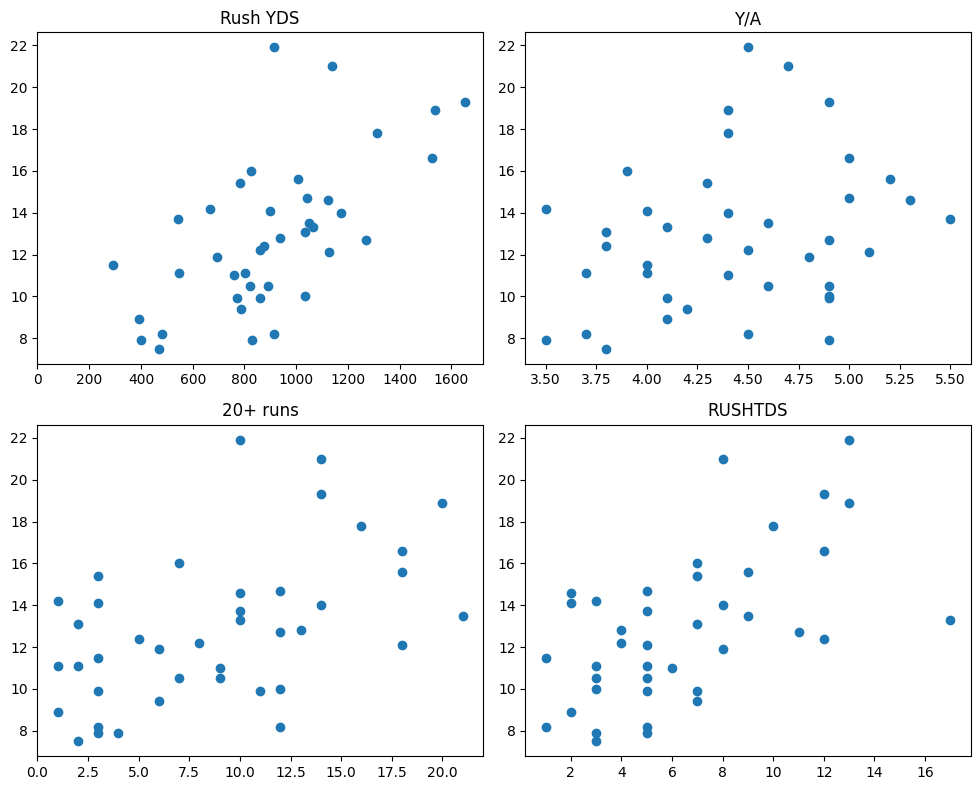

In [5]:
# visualizations for how rushing x's correlate with FPPG (y)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].scatter(x1, y)
axs[0, 0].set_title('Rush YDS')
axs[0, 0].set_xticks(np.arange(0, x1.max(), 200))
axs[0, 1].scatter(x2, y)
axs[0, 1].set_title('Y/A')
axs[1, 0].scatter(x3, y)
axs[1, 0].set_title('20+ runs')
axs[1, 1].scatter(x4, y)
axs[1, 1].set_title('RUSHTDS')

plt.tight_layout()
plt.show()

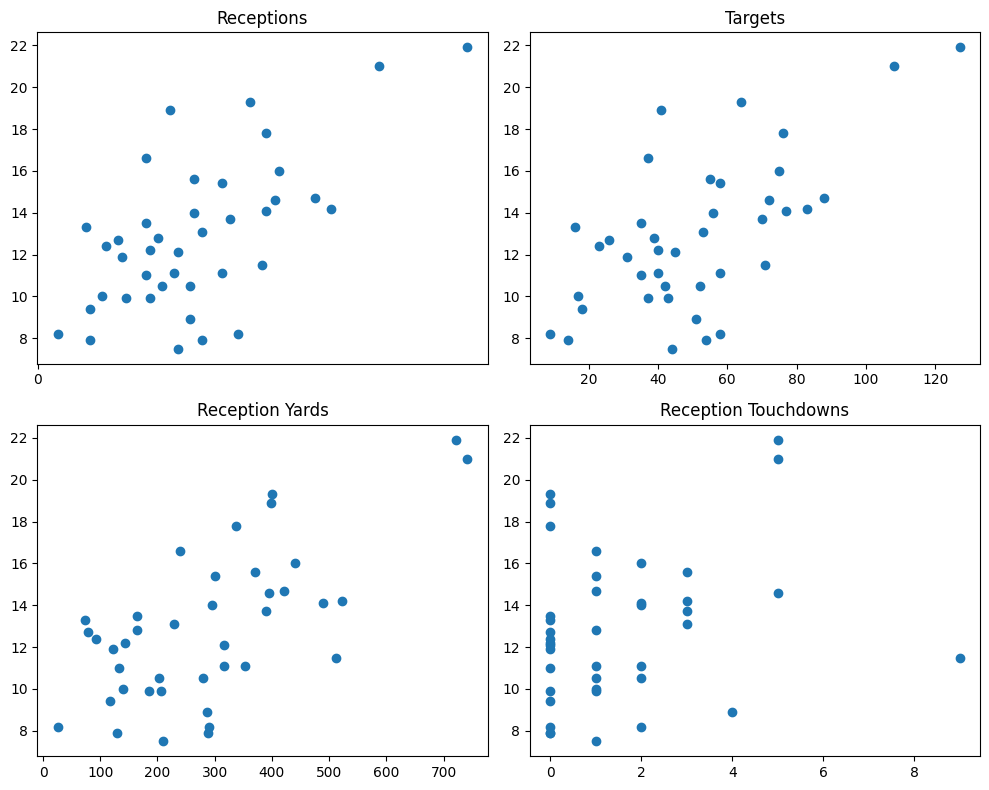

In [6]:
# visualizations for how rushing x's correlate with FPPG (y)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].scatter(x5, y)
axs[0, 0].set_title('Receptions')
axs[0 ,0].set_xticks(np.arange(0, x5.max(), 200))
axs[0, 1].scatter(x6, y)
axs[0, 1].set_title('Targets')
axs[1, 0].scatter(x7, y)
axs[1, 0].set_title('Reception Yards')
axs[1, 1].scatter(x8, y)
axs[1, 1].set_title('Reception Touchdowns')

plt.tight_layout()
plt.show()